## Inputs:
[Year, Month, Day, Hour]

## Output
<p> A 22 length array with each column corressponding to a neighbour of Vancuvour. The value in each cell corresspondes to a probability of crime in that neighbourhood

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


Using TensorFlow backend.


In [2]:
# importing dataset
path='C:/Users/HP/Desktop/Crime Prediction/ELE494-Project-master/Datasets/final_crime.csv'
crime_data=pd.read_csv(path)
crime_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,Neighbourhood,Graffiti,Drinking_Fountain,Google_Trends
0,Theft from Vehicle,2004,10,8,21.0,0.0,6XX W 7TH AVE,Fairview,491380.57,5456930.51,49.265076,-123.118474,Fairview,0.040765,0.402295,72
1,Break and Enter Residential/Other,2004,7,30,7.0,45.0,20XX E 50TH AVE,Victoria-Fraserview,495316.20,5452366.53,49.224065,-123.064326,Victoria-Fraserview,0.075625,0.713125,96
2,Theft from Vehicle,2004,10,8,21.0,30.0,6XX W 7TH AVE,Fairview,491380.57,5456930.51,49.265076,-123.118474,Fairview,0.040765,0.402295,72
3,Break and Enter Residential/Other,2004,6,12,23.0,59.0,8XX GREENCHAIN ST,Fairview,491113.34,5457172.06,49.267245,-123.122153,Fairview,0.174604,0.285012,81
4,Theft from Vehicle,2004,1,16,0.0,0.0,6XX W 7TH AVE,Fairview,491399.54,5456929.87,49.265071,-123.118213,Fairview,0.057692,0.383430,74


In [3]:
#Shape of data set
crime_data.shape

(480724, 16)

# Analyzing the Dataset

Text(0.5, 1.0, 'Number of different crimes')

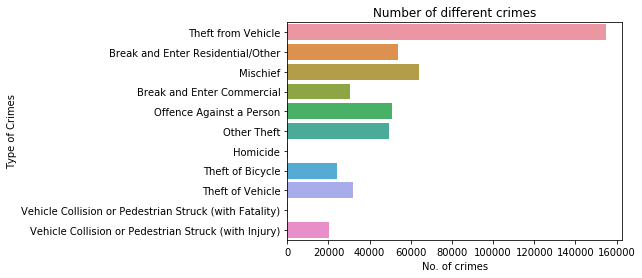

In [4]:
ax = sns.countplot(y="TYPE", data=crime_data)
ax.set_xlabel('No. of crimes')
ax.set_ylabel('Type of Crimes')
ax.set_title('Number of different crimes')

Text(0.5, 1.0, 'Number of crimes in different by YEARS')

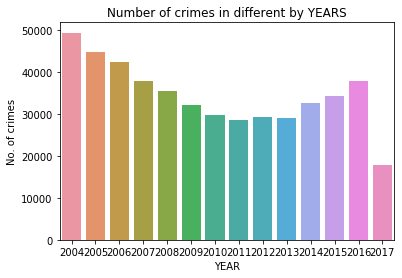

In [5]:
ax = sns.countplot(x="YEAR", data=crime_data)
ax.set_ylabel('No. of crimes')
ax.set_xlabel('YEAR')
ax.set_title('Number of crimes in different by YEARS')


Text(0.5, 1.0, 'Number of crimes in different by MONTHS')

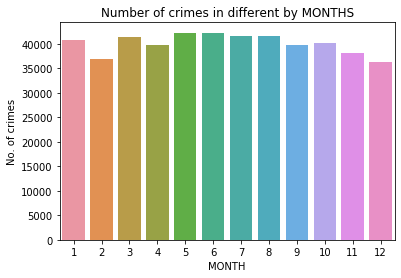

In [6]:
ax = sns.countplot(x="MONTH", data=crime_data)
ax.set_ylabel('No. of crimes')
ax.set_xlabel('MONTH')
ax.set_title('Number of crimes in different by MONTHS')

Text(0.5, 1.0, 'Number of crimes in different by DAYS')

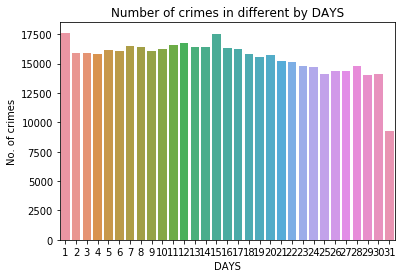

In [7]:
ax = sns.countplot(x="DAY", data=crime_data)
ax.set_ylabel('No. of crimes')
ax.set_xlabel('DAYS')
ax.set_title('Number of crimes in different by DAYS')

Text(0.5, 1.0, 'Number of crimes in different by HOURS')

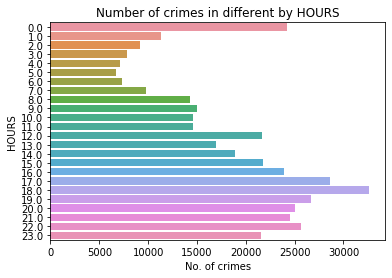

In [8]:
ax = sns.countplot(y="HOUR", data=crime_data)
ax.set_xlabel('No. of crimes')
ax.set_ylabel('HOURS')
ax.set_title('Number of crimes in different by HOURS')

In [9]:
cols=['Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands', 'Fairview',
       'Grandview-Woodland', 'Hastings-Sunrise', 'Kensington-Cedar Cottage',
       'Kerrisdale', 'Killarney', 'Kitsilano', 'Marpole', 'Mount Pleasant',
       'Oakridge', 'Renfrew-Collingwood', 'Riley Park', 'Shaughnessy',
       'South Cambie', 'Strathcona', 'Sunset', 'Victoria-Fraserview',
       'West End', 'West Point Grey']
df=crime_data['Neighbourhood'].value_counts()
df

Downtown                    95402
Killarney                   63674
West End                    40601
Grandview-Woodland          30461
Strathcona                  29790
Fairview                    28967
Mount Pleasant              28827
Renfrew-Collingwood         20773
Kitsilano                   19434
Kensington-Cedar Cottage    17589
Sunset                      14967
Hastings-Sunrise            14321
Victoria-Fraserview         11274
Marpole                     10767
Riley Park                   9344
Oakridge                     8439
Dunbar-Southlands            7761
South Cambie                 6649
West Point Grey              6162
Kerrisdale                   5913
Arbutus-Ridge                5735
Shaughnessy                  3874
Name: Neighbourhood, dtype: int64

Text(0.5, 1.0, 'Crimes in Different Neighbourhood of Vancuvour')

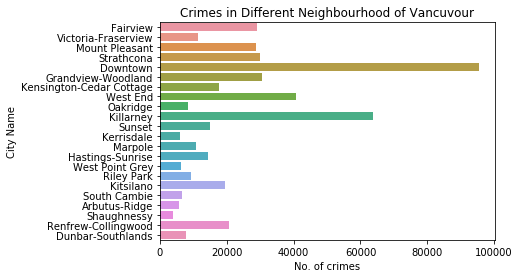

In [10]:
#sns.countplot(crime_data['Neighbourhood'],orient='v')
ax = sns.countplot(y="Neighbourhood", data=crime_data)
ax.set_xlabel('No. of crimes')
ax.set_ylabel('City Name')
ax.set_title('Crimes in Different Neighbourhood of Vancuvour')

# Data pre-processing

In [11]:
#getting the count of null value in each row
crime_data.isnull().sum()

TYPE                     0
YEAR                     0
MONTH                    0
DAY                      0
HOUR                 50837
MINUTE               50837
HUNDRED_BLOCK           11
NEIGHBOURHOOD        52583
X                        0
Y                        0
Latitude                 0
Longitude                0
Neighbourhood            0
Graffiti                 0
Drinking_Fountain        0
Google_Trends            0
dtype: int64

In [12]:
# Droping the empty rows
crime_data.dropna(subset=['NEIGHBOURHOOD'],inplace=True)

In [13]:
crime_data.shape

(428141, 16)

In [14]:
# getting all the columns names in data
crime_data.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'Neighbourhood',
       'Graffiti', 'Drinking_Fountain', 'Google_Trends'],
      dtype='object')

In [15]:
# Import list of all neighbourhood in Vancouver
path_neigh='C:/Users/HP/Desktop/Crime Prediction/ELE494-Project-master/Datasets/cov_localareas.csv'
neighbourhoods=pd.read_csv(path_neigh)
neighbourhoods.head()

,MAPID,NAME,Latitude,Longitude
0,SUN,Sunset,49.218650,-123.091376
1,MP,Mount Pleasant,49.263060,-123.099888
2,RP,Riley Park,49.244679,-123.103239
3,CBD,Downtown,49.279255,-123.119137
4,KITS,Kitsilano,49.265663,-123.166947


In [16]:
# getting only the names of i.e list of names of neighbourhoods around city of vancouver
neighbourhoods=neighbourhoods['NAME']
neighbourhoods

0                       Sunset
1               Mount Pleasant
2                   Riley Park
3                     Downtown
4                    Kitsilano
5            Dunbar-Southlands
6                   Kerrisdale
7                Arbutus-Ridge
8              West Point Grey
9                      Marpole
10                    Oakridge
11                 Shaughnessy
12                    Fairview
13                South Cambie
14                    West End
15                   Killarney
16         Renfrew-Collingwood
17            Hastings-Sunrise
18         Victoria-Fraserview
19    Kensington-Cedar Cottage
20                  Strathcona
21          Grandview-Woodland
Name: NAME, dtype: object

In [17]:
# getting the data of columns year,month,date,hour,neighbourhood 
# which will be used further
crime_data_1=crime_data[['YEAR','MONTH','DAY','HOUR','Neighbourhood']]
crime_data_1.shape

(428141, 5)

In [18]:
# Adding data and time and setting it as index
date_time_col=pd.to_datetime(crime_data_1[['YEAR','MONTH','DAY','HOUR']])
#date_time_col

crime_data_1['Date-Time']=date_time_col
crime_data_1.set_index('Date-Time', inplace=True)

crime_data_1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,YEAR,MONTH,DAY,HOUR,Neighbourhood
Date-Time,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,Fairview
2004-07-30 07:00:00,2004,7,30,7.0,Victoria-Fraserview
2004-10-08 21:00:00,2004,10,8,21.0,Fairview
2004-06-12 23:00:00,2004,6,12,23.0,Fairview
2004-01-16 00:00:00,2004,1,16,0.0,Fairview


In [19]:
# adding a column for each neighbourhood and set it's value to 1,
# if the crime occurs in that neighbourhood otherwise 0 using dummies
neigh_cols=pd.get_dummies(crime_data_1['Neighbourhood'])

#Drop the column for Neighbourhood
crime_data_1=crime_data_1.drop(columns='Neighbourhood')

crime_data_1=pd.concat([crime_data_1,neigh_cols],axis=1)


In [20]:
crime_data_1.head()

,YEAR,MONTH,DAY,HOUR,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
Date-Time,,,,,,,,,,,,,,,,,,,,,
2004-10-08 21:00:00,2004,10,8,21.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-07-30 07:00:00,2004,7,30,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2004-10-08 21:00:00,2004,10,8,21.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-06-12 23:00:00,2004,6,12,23.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-16 00:00:00,2004,1,16,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# crimes in different cities
for i in range(len(cols)):
    x=crime_data_1[cols[i]].value_counts()
    print(cols[i])
    print(x)
    print()


Arbutus-Ridge
0    102518
1      5237
Name: Arbutus-Ridge, dtype: int64 0.9513990070066354

Downtown
1    60209
0    47546
Name: Downtown, dtype: int64 0.4412417057213122

Dunbar-Southlands
0    100875
1      6880
Name: Dunbar-Southlands, dtype: int64 0.9361514546888775

Fairview
0    84030
1    23725
Name: Fairview, dtype: int64 0.7798246021066307

Grandview-Woodland
0    82418
1    25337
Name: Grandview-Woodland, dtype: int64 0.7648647394552457

Hastings-Sunrise
0    95007
1    12748
Name: Hastings-Sunrise, dtype: int64 0.881694584938054

Kensington-Cedar Cottage
0    92235
1    15520
Name: Kensington-Cedar Cottage, dtype: int64 0.8559695605772354

Kerrisdale
0    102354
1      5401
Name: Kerrisdale, dtype: int64 0.9498770358684052

Killarney
0    96165
1    11590
Name: Killarney, dtype: int64 0.8924411860238504

Kitsilano
0    91226
1    16529
Name: Kitsilano, dtype: int64 0.846605725952392

Marpole
0    98058
1     9697
Name: Marpole, dtype: int64 0.9100088162962275

Mount Pleasant

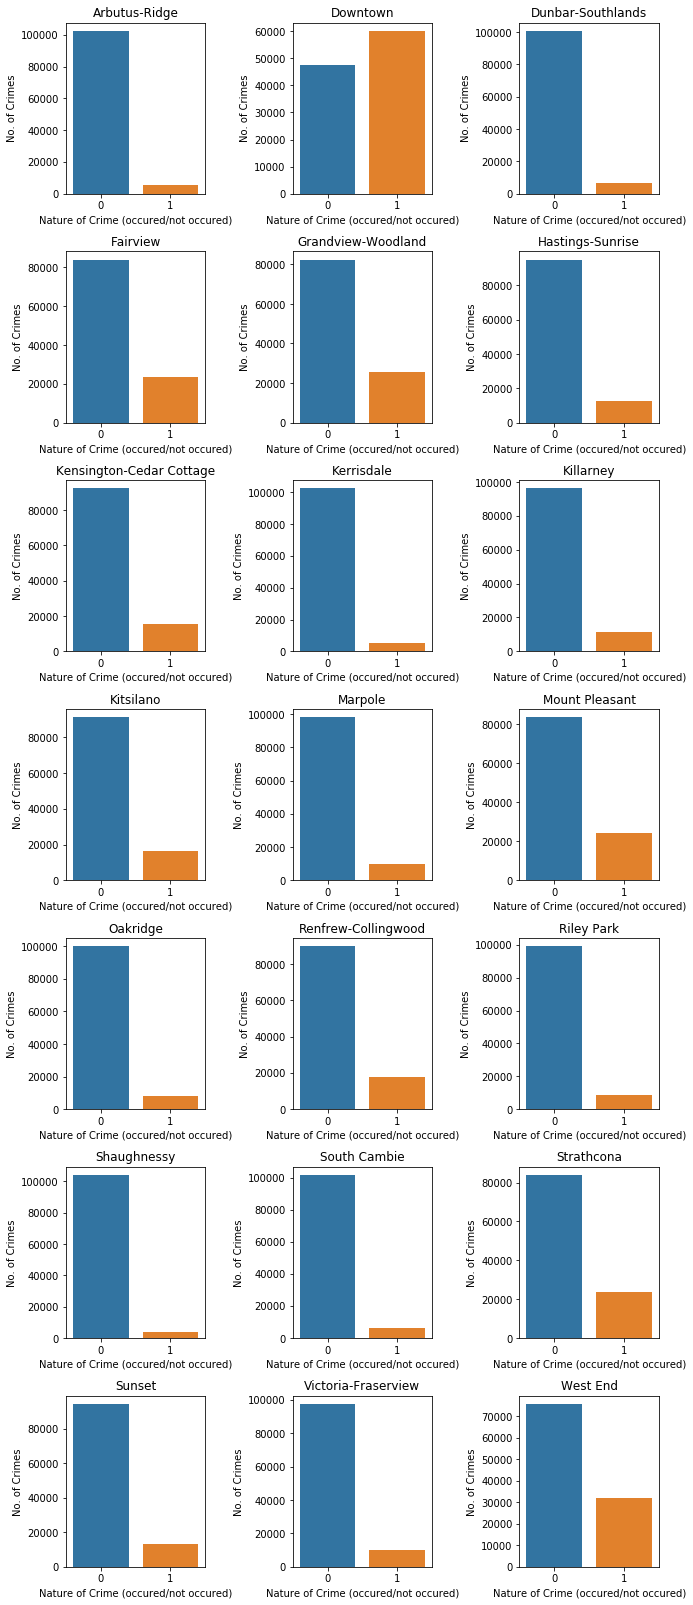

In [40]:
#sns.countplot(crime_data_1['Downtown'])


n_rows=7
n_cols=3
# The subplot grid and figure size of each graph
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2, n_rows*3.2))
for r in range(n_rows):
    for c in range(n_cols):
        i=r*n_cols + c # index to go through the number of columns
        ax=axs[r][c] # Show where to position each sub plot
        sns.countplot(crime_data_1[cols[i]],ax=ax)
        ax.set_title(cols[i])
        ax.set_ylabel('No. of Crimes')
        ax.set_xlabel('Nature of Crime (occured/not occured)')
plt.tight_layout()
#sns.countplot(crime_data_1['West Point Grey'])

In [23]:
# Sort by date-time and removing duplicates
crime_data_1=crime_data_1.sort_values(by='Date-Time')
crime_data_1=crime_data_1.drop_duplicates()

crime_data_1.head()

,YEAR,MONTH,DAY,HOUR,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
Date-Time,,,,,,,,,,,,,,,,,,,,,
2004-01-01,2004,1,1,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-01,2004,1,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# getting input(x) and output(y) arrays
X=crime_data_1[['YEAR','MONTH','DAY','HOUR']]
X=X.drop_duplicates().values
#X[0]


#Y[0]

In [25]:
# grouping by date
crime_data_1=crime_data_1.groupby(['YEAR','MONTH','DAY','HOUR']).sum()
crime_data_1.head(24)

Arbutus-Ridge  Downtown  Dunbar-Southlands  Fairview  \
YEAR MONTH DAY HOUR                                                         
2004 1     1   0.0               0         1                  0         0   
               1.0               0         0                  0         0   
               2.0               0         0                  0         0   
               3.0               0         1                  1         0   
               4.0               0         0                  0         0   
               5.0               0         0                  0         0   
               7.0               0         0                  0         0   
               8.0               0         0                  0         1   
               9.0               0         0                  0         0   
               10.0              0         0                  0         0   
               11.0              0         0                  0         0   
               12.0              0         1                  0         0   
               13.0              0         1                  0         1   
               14.0              0         1                  0         0   
               15.0              0         0                  0         0   
               16.0              0         1                  0         0   
               17.0              0         1                  0         0   
               18.0              0         1                  0         0   
               19.0              0         0                  0         0   
               20.0              0         0                  0         0   
               21.0              0         0                  0         0   
               22.0              0         1                  1         0   
               23.0              0         0                  0         0   
           2   0.0               0         0                  0         0   

                     Grandview-Woodland  Hastings-Sunrise  \
YEAR MONTH DAY HOUR                                         
2004 1     1   0.0                    0                 0   
               1.0                    0                 0   
               2.0                    0                 0   
               3.0                    0                 0   
               4.0                    0                 0   
               5.0                    1                 0   
               7.0                    0                 0   
               8.0                    0                 0   
               9.0                    0                 1   
               10.0                   0                 0   
               11.0                   0                 0   
               12.0                   0                 0   
               13.0                   1                 0   
               14.0                   0                 0   
               15.0                   0                 0   
               16.0                   0                 0   
               17.0                   0                 0   
               18.0                   0                 0   
               19.0                   0                 0   
               20.0                   0                 0   
               21.0                   0                 0   
               22.0                   1                 0   
               23.0                   1                 0   
           2   0.0                    0                 0   

                     Kensington-Cedar Cottage  Kerrisdale  Killarney  \
YEAR MONTH DAY HOUR                                                    
2004 1     1   0.0                          0           1          1   
               1.0                          0           0          0   
               2.0                          0           0          0   
               3.0                          1           0          0   

In [26]:
Y=crime_data_1.values
Y[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=uint8)

In [27]:
# transforming
scaler=MinMaxScaler()
X=scaler.fit(X).transform(X)
print(X[3])

#Y=scaler.fit(Y).transform(Y)
print(Y[3])


[0.         0.         0.         0.13043478]
[0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]


# Making of model

In [28]:
# spliting the data into 33% test and 67% train
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=0)

print("Training Data Size: " + str(X_train.shape))
print("Testing Data Size:" + str(X_test.shape))
print("Training Label Size: " + str(y_train.shape))
print("Testing Label Size: " + str(y_test.shape))

Training Data Size: (72195, 4)
Testing Data Size:(35560, 4)
Training Label Size: (72195, 22)
Testing Label Size: (35560, 22)


In [29]:
# model making using ANN
model=Sequential()

# input with 3 layers
model.add(Dense(32, activation='tanh',input_shape=(X_train.shape[1], )))
model.add(Dense(64, activation='tanh') )
model.add(Dense(32, activation='tanh') )

# output layer
model.add(Dense(y_train.shape[1], activation='sigmoid') )

# compiling the ANN model
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 22)                726       
Total params: 5,078
Trainable params: 5,078
Non-trainable params: 0
_________________________________________________________________


In [30]:
# training the model
result=model.fit(X_train, y_train,
                epochs=15,
                batch_size=128,
                validation_split=0.2,
                verbose=1)

Train on 57756 samples, validate on 14439 samples
Epoch 1/15
57756/57756 [==============================] - 1s 20us/step - loss: 0.3775 - accuracy: 0.8560 - val_loss: 0.3659 - val_accuracy: 0.8610
Epoch 2/15
57756/57756 [==============================] - 1s 17us/step - loss: 0.3646 - accuracy: 0.8609 - val_loss: 0.3646 - val_accuracy: 0.8609
Epoch 3/15
57756/57756 [==============================] - 1s 17us/step - loss: 0.3637 - accuracy: 0.8610 - val_loss: 0.3638 - val_accuracy: 0.8610
Epoch 4/15
57756/57756 [==============================] - 1s 17us/step - loss: 0.3630 - accuracy: 0.8611 - val_loss: 0.3630 - val_accuracy: 0.8609
Epoch 5/15
57756/57756 [==============================] - 1s 17us/step - loss: 0.3623 - accuracy: 0.8611 - val_loss: 0.3627 - val_accuracy: 0.8611
Epoch 6/15
57756/57756 [==============================] - 1s 17us/step - loss: 0.3618 - accuracy: 0.8611 - val_loss: 0.3621 - val_accuracy: 0.8611
Epoch 7/15
57756/57756 [==============================] - 1s 17us/st

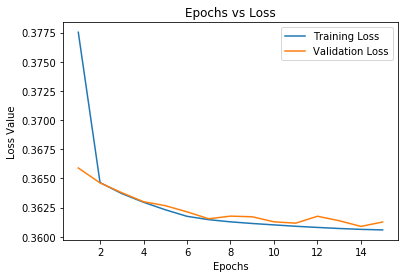

In [31]:
# function to plot loss vs epochs
def loss_curve(result):
    train_loss=result.history['loss']
    val_loss=result.history['val_loss']
    x_axis=range(1,len(result.history['loss'])+1)
    plt.figure()
    plt.plot(x_axis, train_loss, label='Training Loss')
    plt.plot(x_axis, val_loss, label='Validation Loss')
    plt.ylabel('Loss Value')
    plt.xlabel('Epochs')
    plt.title('Epochs vs Loss')
    plt.legend()
loss_curve(result)

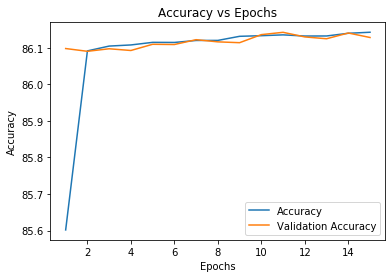

In [32]:
# function to plot accuracy vs epochs
def accuracy(result):
    acc=result.history['accuracy']
    val_acc=result.history['val_accuracy']
    x_axis=range(1,len(result.history['accuracy'])+1)
    plt.figure()
    plt.plot(x_axis, np.dot(acc,100), label='Accuracy')
    plt.plot(x_axis,np.dot(val_acc,100),label='Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.title('Accuracy vs Epochs')
    plt.legend()
accuracy(result)

In [33]:
#Evaluating on Test Dataset")
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 86.15%


In [34]:
# Predicting for random year/month/day/hour
neigh=crime_data_1.columns
ans = model.predict(np.array([[2020, 5,1,10.0]]))
for i in range(22):
    print(neigh[i]," ---> ",ans[0][i])

Arbutus-Ridge  --->  0.07446049
Downtown  --->  0.78440845
Dunbar-Southlands  --->  0.08249623
Fairview  --->  0.3476922
Grandview-Woodland  --->  0.2893378
Hastings-Sunrise  --->  0.14639248
Kensington-Cedar Cottage  --->  0.18506092
Kerrisdale  --->  0.083674885
Killarney  --->  0.1195641
Kitsilano  --->  0.29685953
Marpole  --->  0.12969732
Mount Pleasant  --->  0.34416485
Oakridge  --->  0.09356365
Renfrew-Collingwood  --->  0.25241882
Riley Park  --->  0.10583594
Shaughnessy  --->  0.058462452
South Cambie  --->  0.09862762
Strathcona  --->  0.40877
Sunset  --->  0.12867753
Victoria-Fraserview  --->  0.09019667
West End  --->  0.42007828
West Point Grey  --->  0.08213108


In [38]:

ans = model.predict(np.array([[2020, 8, 5, 0.0]]))
ans

array([[0.07446049, 0.78440845, 0.08249623, 0.3476922 , 0.2893378 ,
        0.14639248, 0.18506092, 0.08367489, 0.1195641 , 0.29685953,
        0.12969732, 0.34416485, 0.09356365, 0.25241882, 0.10583594,
        0.05846245, 0.09862762, 0.40877   , 0.12867753, 0.09019667,
        0.42007828, 0.08213108]], dtype=float32)